In [4]:
!pip install wordcloud

Saved: The_Science_of_Getting_Rich.txt
Saved: The_Engineering_of_the_Human_Body.txt
Saved: The_History_of_the_Peloponnesian_War.txt
Token counts:
- The Science of Getting Rich: 23960 tokens
- The Engineering of the Human Body: 21027 tokens
- The History of the Peloponnesian War: 208525 tokens

Most common words in each text:
- The Science of Getting Rich:
[('and', 1309), ('the', 1080), ('to', 1040), ('of', 575), ('i', 522), ('my', 498), ('a', 381), ('in', 377), ('with', 320), ('s', 267)]

- The Engineering of the Human Body:
[('the', 1016), ('and', 1015), ('to', 839), ('of', 576), ('i', 382), ('a', 324), ('in', 293), ('that', 272), ('my', 265), ('with', 234)]

- The History of the Peloponnesian War:
[('the', 18148), ('and', 8550), ('of', 7662), ('to', 7606), ('in', 4273), ('their', 2806), ('a', 2754), ('that', 2461), ('they', 2423), ('by', 2079)]

Generating word clouds for visualization...


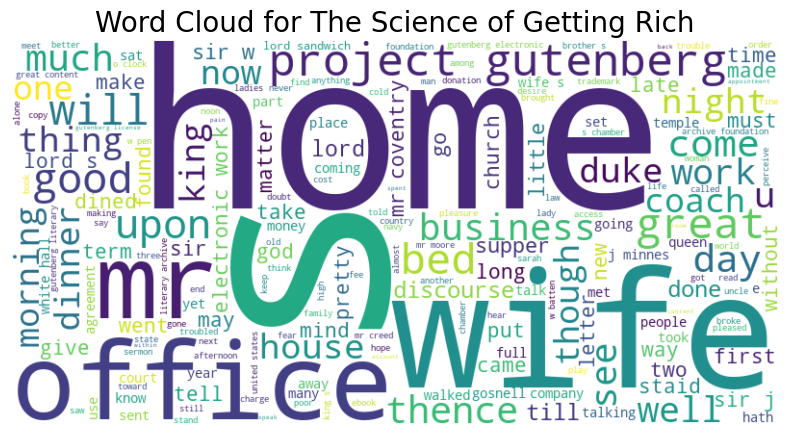

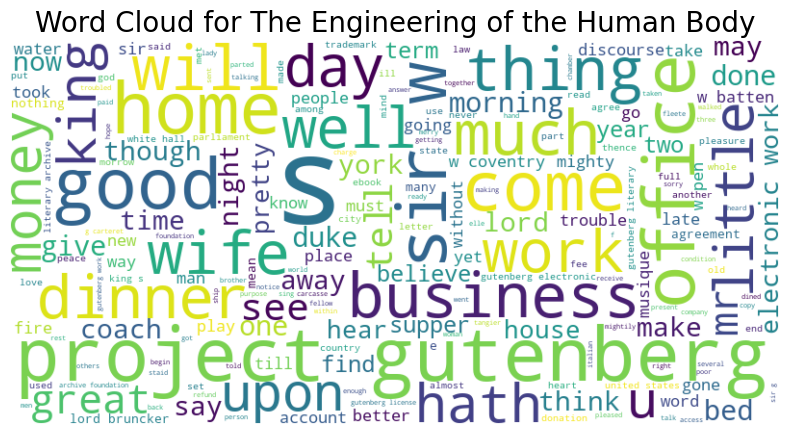

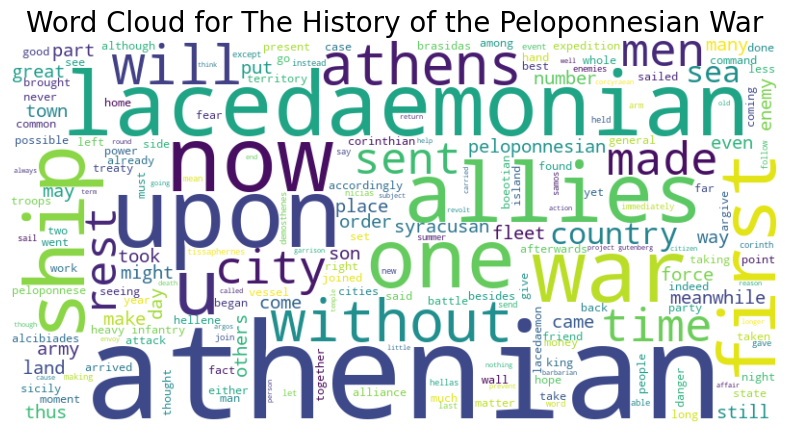

In [1]:
import requests
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# This script downloads three texts from Project Gutenberg related to Science, Engineering, and History.
# It then tokenizes the text, counts the most common words, and generates word clouds for visualization.

# Function to download a text file from a given URL and save it locally.
def download_text(url, filename):
    """
    Downloads a text file from a given URL and saves it locally.
    
    Parameters:
        url (str): The URL of the text file to download.
        filename (str): The name of the file to save the downloaded text.
    """
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    if response.ok:
        with open(filename, "w", encoding="utf-8") as file:
            file.write(response.text)
        print(f"Saved: {filename}")
    else:
        print(f"Failed to retrieve {url}")

# Downloading three texts related to Science, Engineering, and History.
url_1 = "https://www.gutenberg.org/cache/epub/4137/pg4137.txt"
download_text(url_1, "The_Science_of_Getting_Rich.txt")

url_2 = "https://www.gutenberg.org/cache/epub/4173/pg4173.txt"
download_text(url_2, "The_Engineering_of_the_Human_Body.txt")

url_3 = "https://www.gutenberg.org/cache/epub/7142/pg7142.txt"
download_text(url_3, "The_History_of_the_Peloponnesian_War.txt")

# Function to tokenize text into individual words.
def tokenize_text(file_name):
    """
    Reads a text file, converts it to lowercase, and tokenizes it into words.
    
    Parameters:
        file_name (str): The name of the file to tokenize.
    
    Returns:
        list: A list of tokenized words.
    """
    with open(file_name, "r", encoding="utf-8") as file:
        text = file.read()
    tokens = re.findall(r"\b\w+\b", text.lower())
    return tokens

# Tokenizing the three texts
tokens_1 = tokenize_text("The_Science_of_Getting_Rich.txt")
tokens_2 = tokenize_text("The_Engineering_of_the_Human_Body.txt")
tokens_3 = tokenize_text("The_History_of_the_Peloponnesian_War.txt")

# Printing the token count for each text
print("Token counts:")
print(f"- The Science of Getting Rich: {len(tokens_1)} tokens")
print(f"- The Engineering of the Human Body: {len(tokens_2)} tokens")
print(f"- The History of the Peloponnesian War: {len(tokens_3)} tokens")

# Function to find the most common words in a list of tokens.
def most_common_words(tokens, n=10):
    """
    Counts the frequency of words in a list of tokens and returns the most common words.
    
    Parameters:
        tokens (list): A list of words (tokens).
        n (int): The number of most common words to return.
    
    Returns:
        list: A list of tuples containing the most common words and their frequencies.
    """
    word_counts = Counter(tokens)
    return word_counts.most_common(n)

# Getting the most common words for each text
common_words_1 = most_common_words(tokens_1)
common_words_2 = most_common_words(tokens_2)
common_words_3 = most_common_words(tokens_3)

# Printing the most common words for each text
print("\nMost common words in each text:")
print("- The Science of Getting Rich:")
print(common_words_1)
print("\n- The Engineering of the Human Body:")
print(common_words_2)
print("\n- The History of the Peloponnesian War:")
print(common_words_3)

# Function to generate and display a word cloud from a list of tokens.
def generate_word_cloud(tokens, title="Word Cloud"):
    """
    Generates and displays a word cloud from a list of tokens.
    
    Parameters:
        tokens (list): A list of words (tokens).
        title (str): The title of the word cloud plot.
    """
    text = " ".join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()

# Generating and displaying word clouds for each text
print("\nGenerating word clouds for visualization...")
generate_word_cloud(tokens_1, "Word Cloud for The Science of Getting Rich")
generate_word_cloud(tokens_2, "Word Cloud for The Engineering of the Human Body")
generate_word_cloud(tokens_3, "Word Cloud for The History of the Peloponnesian War")

# Final summary:
# - The script downloads and processes three different texts.
# - It extracts word frequencies to identify common words.
# - Finally, it visualizes the results using word clouds.
# This helps analyze key themes and word usage in each text.
